In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/sample_data/internet_service_churn.csv"

df = pd.read_csv(file_path)
print("Uploaded")


Uploaded


In [3]:
print("The first 5 lines")
display(df.head())

print("\nGeneral info")
df.info()

print("\nStatistics of numerical data")
display(df.describe())

The first 5 lines


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1



General info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB

Statistics of numerical data


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


Number of missing values
reamining_contract    21572
download_avg            381
upload_avg              381
dtype: int64


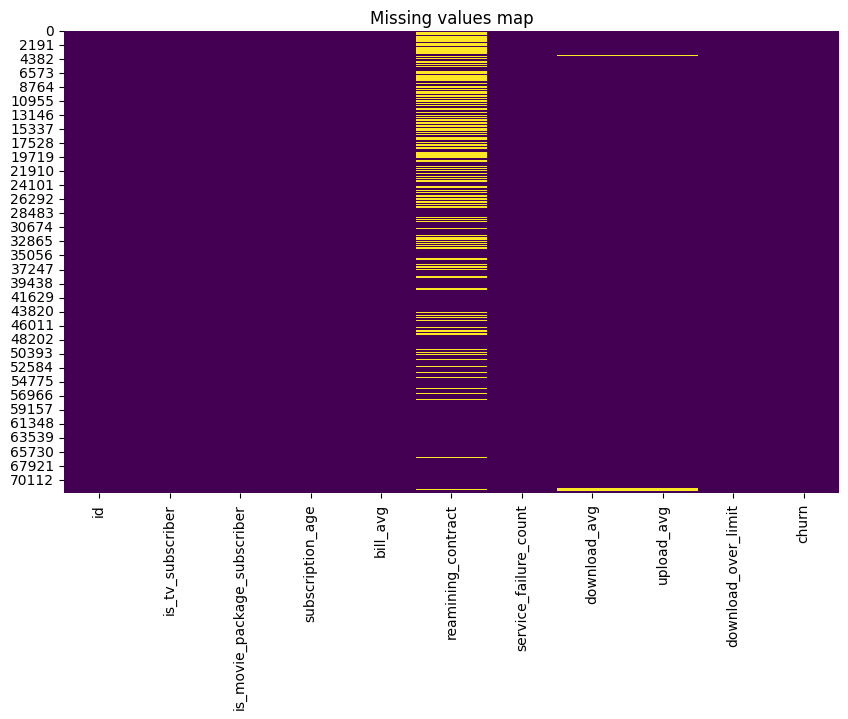

In [4]:
# Виявлення відсутніх значень
print("Number of missing values")
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing values map")
plt.show()

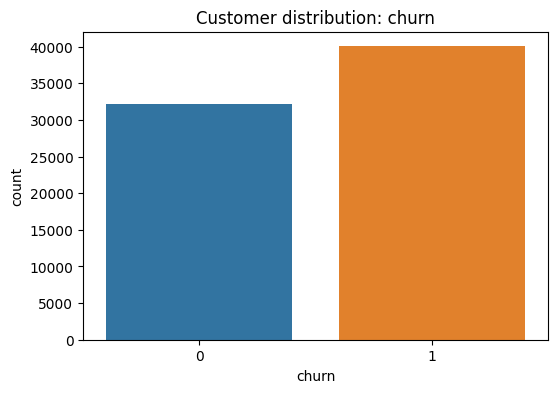

churn
1    0.554141
0    0.445859
Name: proportion, dtype: float64


In [5]:
# Графік співвідношення
target_column = "churn"

plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, data=df, hue=target_column, legend=False)
plt.title(f"Customer distribution: {target_column}")
plt.show()

print(df[target_column].value_counts(normalize=True))


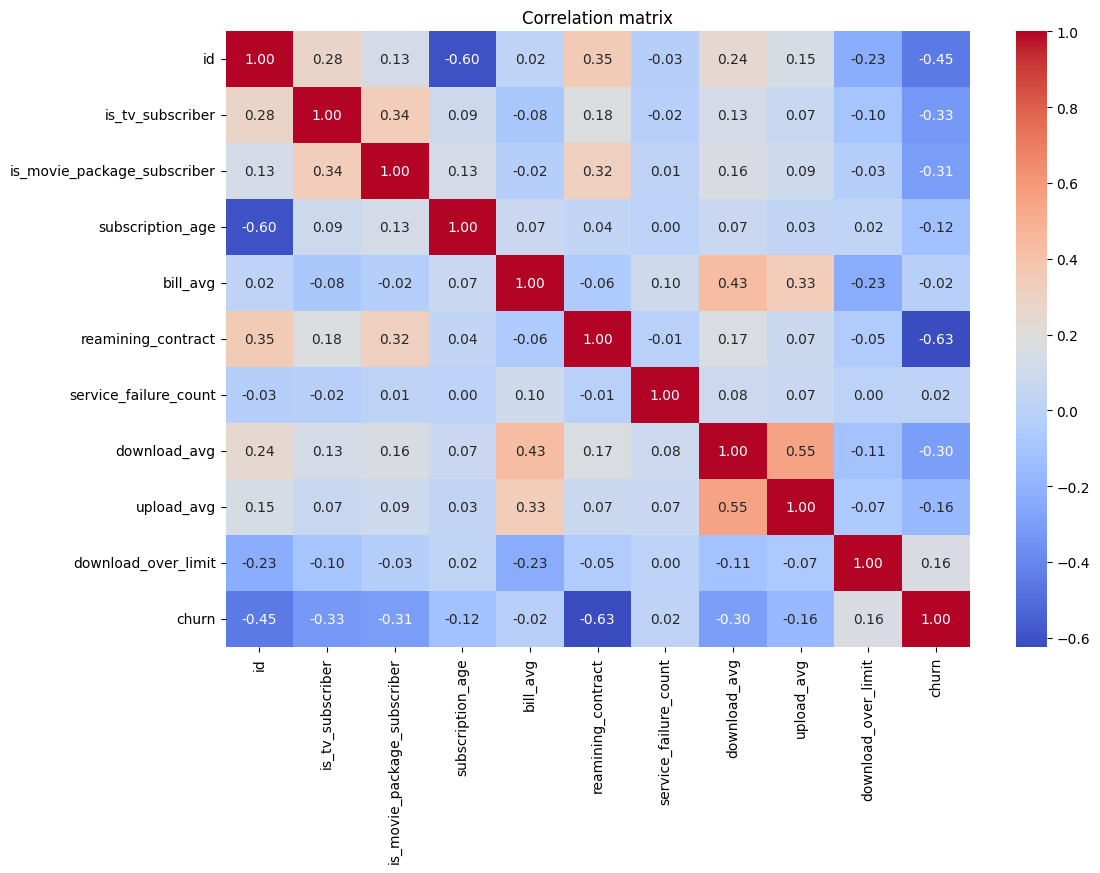

Top factors (Churn)
churn                          1.000000
download_over_limit            0.158318
service_failure_count          0.021575
bill_avg                      -0.021058
subscription_age              -0.122441
upload_avg                    -0.162690
download_avg                  -0.298063
is_movie_package_subscriber   -0.307167
is_tv_subscriber              -0.327582
id                            -0.451142
reamining_contract            -0.625450
Name: churn, dtype: float64


In [6]:
# Аналіз кореляцій
plt.figure(figsize=(12, 8))
numeric_only=True
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

print("Top factors (Churn)")
print(correlation_matrix["churn"].sort_values(ascending=False))

In [7]:
!pip install -q tensorflow

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = df.copy()

target_col = "churn"
drop_cols = ["id"]

X = data.drop(columns=drop_cols + [target_col])
y = data[target_col].astype("int32")

# Заповнюємо пусті значення медіаной
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

print("NaN в X після fillna:", X.isna().sum().sum())

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

# Масштабування
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("NaN в X_train:", np.isnan(X_train).sum())
print("NaN в X_test:", np.isnan(X_test).sum())


NaN в X після fillna: 0
NaN в X_train: 0
NaN в X_test: 0


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


model = build_model(X_train.shape[1])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Навчання моделі
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7237 - loss: 0.5598 - val_accuracy: 0.8416 - val_loss: 0.3800
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8399 - loss: 0.3819 - val_accuracy: 0.8434 - val_loss: 0.3682
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8443 - loss: 0.3786 - val_accuracy: 0.8463 - val_loss: 0.3624
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8456 - loss: 0.3659 - val_accuracy: 0.8459 - val_loss: 0.3584
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8447 - loss: 0.3683 - val_accuracy: 0.8479 - val_loss: 0.3547
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8460 - loss: 0.3654 - val_accuracy: 0.8495 - val_loss: 0.3516
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8470 - loss: 0.3608 - val_accuracy: 0.8510 - val_loss: 0.3492
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8507 - loss: 0.3542 - val_accuracy: 0

In [11]:
# Оцінка моделі
from sklearn.metrics import classification_report, roc_auc_score

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

y_proba = model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification report:\n")
print(classification_report(y_test, y_pred))


452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test loss: 0.2187
Test accuracy: 0.9234
ROC-AUC: 0.9642684231986975

Classification report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      6445
           1       0.93      0.93      0.93      8010

    accuracy                           0.92     14455
   macro avg       0.92      0.92      0.92     14455
weighted avg       0.92      0.92      0.92     14455



In [12]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)


In [13]:
import keras
import joblib
import json

keras.saving.save_model(model, "churn_NNmodel.keras")

joblib.dump(scaler, "scalerNN.pkl")

feature_names = X.columns.tolist()
with open("feature_namesNN.json", "w") as f:
    json.dump(feature_names, f)

nn_metrics = {
    "accuracy": accuracy,
    "0": {
        "precision": report["0"]["precision"],
        "recall": report["0"]["recall"],
        "f1-score": report["0"]["f1-score"],
        "support": report["0"]["support"],
    },
    "1": {
        "precision": report["1"]["precision"],
        "recall": report["1"]["recall"],
        "f1-score": report["1"]["f1-score"],
        "support": report["1"]["support"],
    }
}
with open("nn_metrics.json", "w") as f:
    json.dump(nn_metrics, f, indent=4)


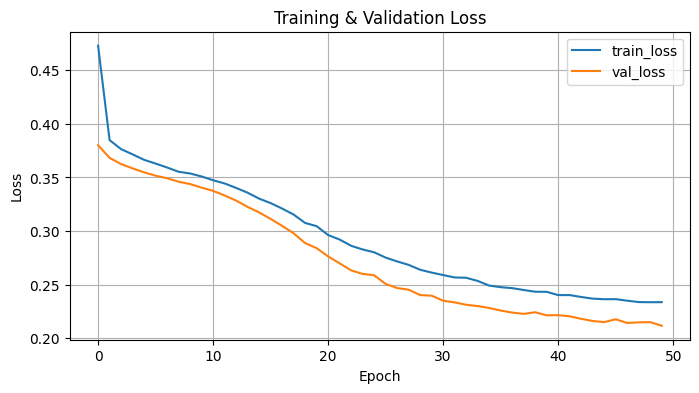

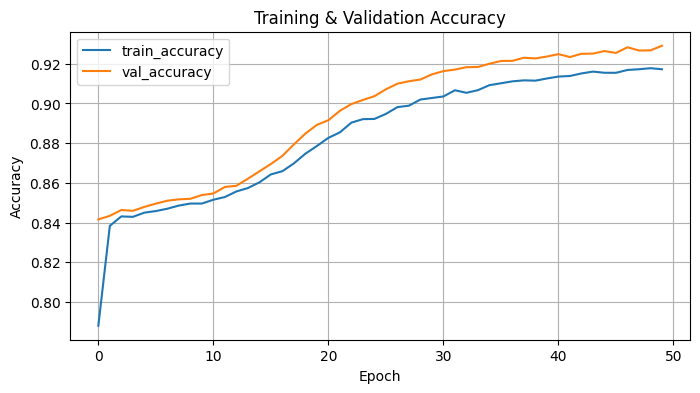

In [14]:
import matplotlib.pyplot as plt

hist = history.history

# ----- Loss -----
plt.figure(figsize=(8, 4))
plt.plot(hist["loss"], label="train_loss")
plt.plot(hist["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- Accuracy -----
plt.figure(figsize=(8, 4))
plt.plot(hist["accuracy"], label="train_accuracy")
plt.plot(hist["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


**Training & Validation Loss**

Loss падает стабільно та плавно - це признак відсутності перенавчання

Validation Loss нижче train loss - цу признак того, що модель не трохи недонавчена

**Training & Validation Accuracy**

Треніровка та валідация ростуть плавно

К 50-й епосі:
train_accuracy ≈ 0.91
val_accuracy ≈ 0.93

Валидационная accuracy трохи вище, ніж тренувальна.

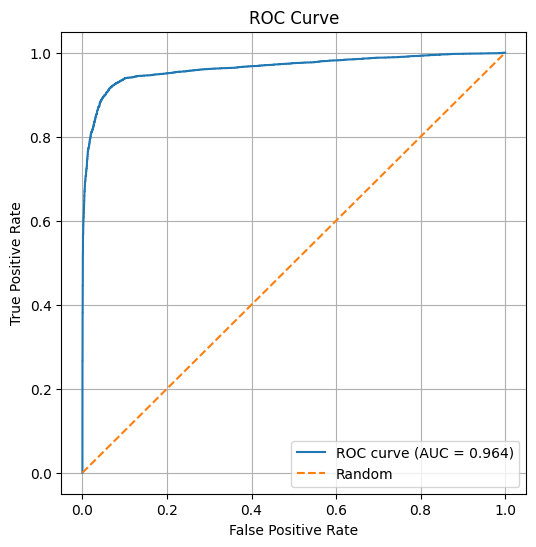

In [15]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


**ROC Curve **

AUC = 0.964

Це признак того, що модель впевненно розділяє клеєнтів, працює краще випадкового класифікатора

<Figure size 400x400 with 0 Axes>

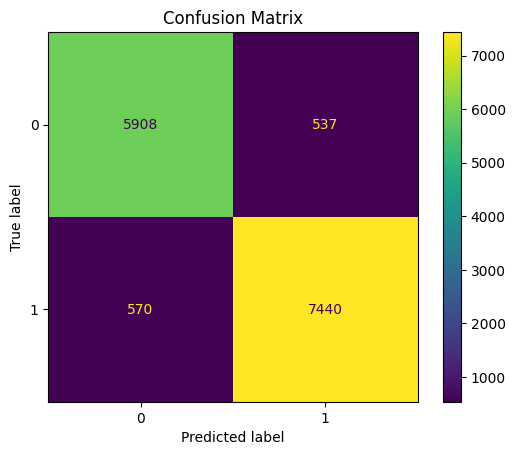

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(4, 4))
disp.plot(values_format="d")
plt.title("Confusion Matrix")
plt.show()


**Confusion Matrix**

Модель добре розпізнає класи:
True Positive (7429) — правильно знашла клеєнтів, що пішли
True Negative (5914) — правильно знашла тих, що залишились
✔Помилок мало (FP = 531 та FN = 581)


**Загальний висновок**
1. немає перенавчання - train/val accuracy та loss поряд, без розходжень.

2. висока узагальнююча спроможність

3. помилки збалансовані - FN тв FP в нормальном діапазоні.

4. модель стабільна - немає скачків, нестабільності, “завала” навчання.